# Tarea 1

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]?


Para facilitar las cosas, conviene definir una función que simplifique el tomar los iterados de una función:

In [1]:
"""
    iteraciones(f::Function, número_iteraciones::Int, x0)

Genera un array unidimensional de tamaño `1 + número_iteraciones` que en la entrada ``i + 1`` tiene al elemento proveniente de iterar `x0` ``ì`` veces con la función `f`. En el caso de ```i = 1``, el valor en el array es igual a la condición inicial usada.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

En particular, la condición inicial suministrada `x0` es convertida a su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

# Ejemplo
```julia-repl

julia> iteraciones(x->x^2, 5, 2)
6-element Array{Int64,1}:
          2
          4
         16
        256
      65536
 4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iteraciones(v, 2, [1, 3])
3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]  
 [-2.0, 3.0] 
 [-5.0, -6.0]
```
"""
function iteraciones(f::Function, número_iteraciones::Int, x0)
    
    valor = float.(x0)
    
    iterados = [valor]
    
    for i in 1:número_iteraciones
        
        valor = f(valor)
        push!(iterados, valor)
    end
    
    return(iterados)
end

iteraciones

Así como eventualmente el valor de la iteración correspondiente:

In [2]:
"""
    iterar(f::Function, número_iteraciones::Int, x0)

Devuelve el resultado de iterar `número_iteraciones` veces la función `f` con condición inicial `x0`.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

En particular, la condición inicial suministrada `x0` es convertida a su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

# Ejemplo
```julia-repl

julia> iterar(x->x^2, 5, 2)
4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iterar(v, 2, [1, 3])
2-element Array{Float64,1}:
 -5.0
 -6.0
```
"""
function iterar(f::Function, número_iteraciones::Int, x0)
    
    iterados = iteraciones(f, número_iteraciones, x0)
    valor = last(iterados)
    
    return(valor)
end

iterar

Para la función $ F(x) = x^2 - 2 $, consideremos el resultado de usar las condiciones iniciales dadas iterando $F$ 1000 veces:

In [3]:
F(x) = x^2 - 2

x0 = 0
número_iteraciones = 1000

iteraciones_F_1 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.0
 -2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  ⋮  
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

Entonces, $x_0 = 0$ es un punto eventualmente periódico, más aún, la órbita a la que converge es de periodo uno, lo que indica que la iteración converge eventualmente a un punto fijo: $x = 2$.

In [4]:
x0 = 0.1
iteraciones_F_2 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.1                
 -1.99               
  1.9601000000000002 
  1.8419920100000007 
  1.3929345649038427 
 -0.05973329789614246
 -1.9964319331224507 
  1.9857404635910454 
  1.9431651887427797 
  1.7758909507417626 
  1.1537886689264814 
 -0.6687717074568584 
 -1.5527444033052382 
  ⋮                  
 -0.3682674012305529 
 -1.8643791211908949 
  1.4759095075325335 
  0.17830887442492527
 -1.9682059453013163 
  1.8738346431194484 
  1.5112562697545906 
  0.28389551287255976
 -1.9194033377708262 
  1.6841091730457882 
  0.8362237067369684 
 -1.3007299122910845 

No se observa ningún tipo de patrón evidente, aunque una mejor forma de investigar esto es realizando una gráfica:

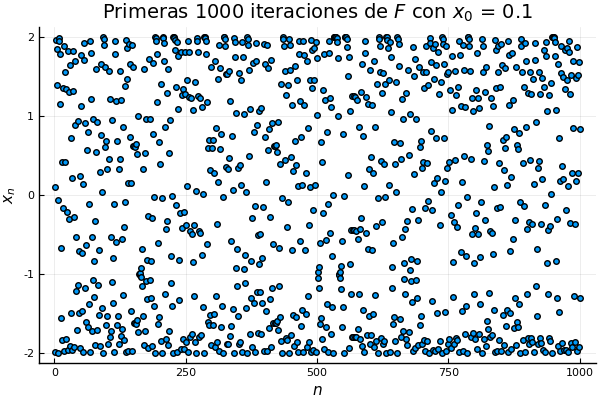

In [5]:
using Plots
using LaTeXStrings
pyplot()

scatter(iteraciones_F_2, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

No se observa periodicidad, aunque se nota que todos los valores resultantes están en el intervalo [-2, 2].

In [6]:
x0 = 0.001
iteraciones_F_3 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.001              
 -1.999999           
  1.9999960000010004 
  1.9999840000200018 
  1.9999360003360063 
  1.999744005439982  
  1.9989760872931428 
  1.9959053975698025 
  1.9836383560482713 
  1.9348211275858884 
  1.7435327957527287 
  1.0399066098653265 
 -0.9185942427584037 
  ⋮                  
  1.996506616727705  
  1.986038670637507  
  1.944349601267596  
  1.7804953719494598 
  1.1701637695334455 
 -0.6307167524712776 
 -1.6021963781520852 
  0.5670332341636595 
 -1.6784733113539005 
  0.8172726569273281 
 -1.332065404238946  
 -0.22560175882973366

No se observa ningún tipo de patrón evidente, aunque una mejor forma de investigar esto es realizando una gráfica:

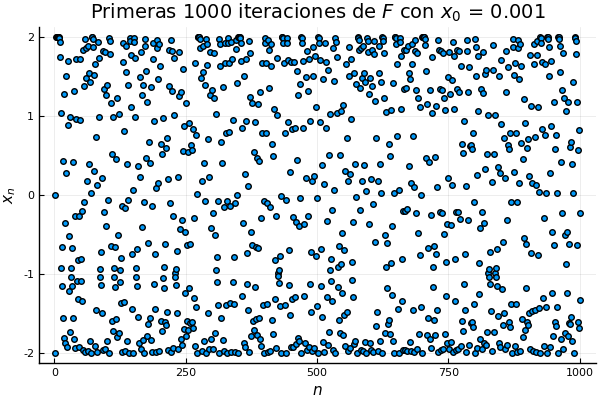

In [7]:
scatter(iteraciones_F_3, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

No se observa periodicidad, aunque se nota que todos los valores resultantes están en el intervalo [-2, 2].

Como se pudo observar en los ejemplos, existió un punto que fue eventualmente periódico y otros dos que aparentemente no tienen ningún patrón que sea evidente. Sin embargo, en todos los casos el valor de las iteraciones permanece dentro del intervalo [-2, 2], esto es por lo siguiente:

Sea $ x \in [-2, 2]$, entonces, $x^2 \in [0, 4] \implies F(x) = x^2 -2 \in [-2, 2] $. 

Esto quiere decir que todas las condiciones iniciales tomadas en el intervalo [-2, 2] son mapeadas al mismo intervalo con la función $F$. Esto, considerando los ejemplos anteriores, nos indica que hay mapeos que no son periódicos o eventualmente periódicos pero acotados.

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

Una forma sencilla de implementar lo solicitado es generalizando el código anterior:

In [8]:
"""
    análisis_gráfico(f::Function, número_iteraciones::Int, x0::Real, a::Real, b::Real, paso::Real, c::Real, d::Real; title::String = "", ylabel::String = "\$f(x)\$", color = :green)

Genera un análisis gráfico de los iterados de la función `f` por el `número_iteraciones` dado con condición inicial `x0`. La ventana de graficación usada está dada por `` [a, b]\\times[c, d] ``. Para graficar la función, se usan puntos de muestreo separados por `paso` en el intervalo `` [a,b] ``. El título, el título del eje y y el color de las líneas para los iterados se pueden cambiar usando los mismos argumentos que en `Plots.jl`.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar,
+ `x0`, el punto inicial usado, y,
+ `a`, `b`, `c` y `d`, los parámetros usados para establecer la ventana de visualización,

En particular, la condición inicial suministrada `x0` es convertida a 
su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

Opcionalmente se pueden especificar:

+ `title`, el título de la gráfica mediante un string,
+ `ylabel`, el título del eje y mediante un string, y,
+ `color` el color de las líneas usadas para los iterados.

En particular, `title` y `ylabel` son interpretados como strings con ecuaciones escritas en  `` \\LaTeX `` mediante el comando `LaTeXString`. Esto quiere decir que el texto no es interpretado dentro del entorno matemático de  `` \\LaTeX `` sin incluirlo entre pares de  `` \\ \$ `` (signos de dinero escapados).

# Ejemplo

Para visualizar los primeros cinco iterados de la función `` x \\mapsto \\sqrt{x} `` en la ventana `` [0, 1] \\times [0,1] `` con la función graficada con una resolución de paso igual a 0.01 con condición inicial 0.5 se puede usar el comando:
```julia-repl

julia> análisis_gráfico(x->sqrt(x), 5, 0.5, 0, 1, 0.01, 0, 1)
```

Para hacer lo mismo, pero cambiando el título a "Ejemplo", el título del eje y a "Eje y" y el color de las lineas para los iterados a rojo se puede usar:
```julia-repl

julia> análisis_gráfico(x->sqrt(x), 5, 0.5, 0, 1, 0.01, 0, 1, title = "Ejemplo", ylabel = "Eje y", color = :black)
```
"""
function análisis_gráfico(f::Function, número_iteraciones::Int, x0::Real, a::Real, b::Real, paso::Real, c::Real, d::Real; title::String = "", ylabel::String = "\$f(x)\$", color = :green)

    #Convirtiendo los elementos de los puntos muestra a flotantes:
    a = float(a)
    b = float(b)
    paso = float(paso)

    #Cargando los iterados:
    iterados = iteraciones(f, número_iteraciones, x0)

    #Generando la gráfica de la función:
    rango_x = a:paso:b
    
    título = LaTeXString(title)
    leyenda_y = LaTeXString(ylabel)
    
    gráfica = plot(rango_x, f, 
        xaxis = (L"x", (a, b)),
        yaxis = (leyenda_y, (c, d)),
        legend = false, 
        title = título, 
        grid = false)
    
    #Y de la identidad:
    
    plot!(gráfica, x -> x, color = :red)

    #Gráfica de los iterados iniciales:
    x_0 = iterados[1]
    x_1 = iterados[2]

    x_iniciales = [x_0, x_0, x_1]
    y_iniciales = [0, x_1, x_1]

    plot!(gráfica, x_iniciales, y_iniciales, 
        line=(color, :path, 2.0, :dot), 
        marker=(:circle, 0.5))

    #Gráfica del resto de los iterados:
    for i in 2:número_iteraciones

        x_actual = iterados[i]
        x_siguiente =  iterados[i+1]
        
        x = [x_actual, x_actual, x_siguiente]
        y = [x_actual, x_siguiente, x_siguiente]

        plot!(gráfica, x, y, 
            line=(color, :path, 2.0, :dot), 
            marker=(:circle, 0.5))
    end
    
    return(gráfica)
end

análisis_gráfico

Para realizar el análisis de la función $F(x) = \sqrt{x}$ en varias condiciones iniciales se puede utilizar el macro `@manipulate` de la paquetería `Interact.jl`:

In [9]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5e3f21313972c959841d02dd5dd703dce3bd1f4a-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5e3f21313972c959841d02dd5dd703dce3bd1f4a-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x0=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_05", 0, Any[SyncCallback(Scope("knockout-component-89521c06-931b-4239-8d4a-784ad3186135", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_03", ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"  …  "3.1", "3.2", "3.3", "3.4", "3.5", "3.6", "3.7", "3.8", "3.9", "4.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_04", "2.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_02", 21, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.0:0.1:4.0)), Observable{Float64}("ob_01", 2.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.0:0.1:4.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##6#8,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##6#8,Observable{Any}}(##6#8(), Observable{Any}("ob_06", Plot{Plots.PyPlotBackend() n=7}, Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.0:0.1:4.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/gabriel/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.n
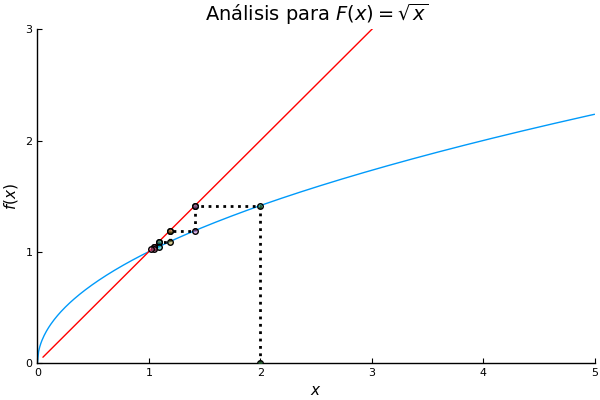
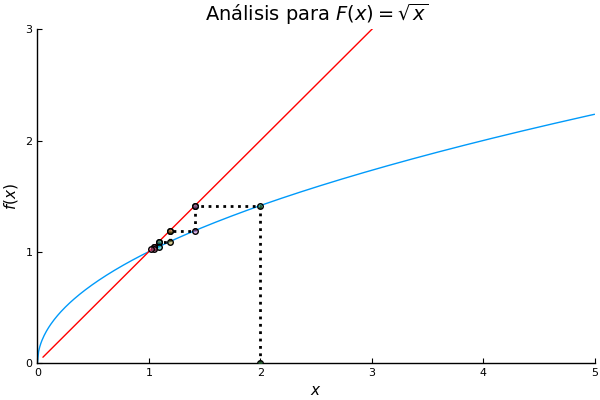

In [10]:
F(x) = sqrt(x)
número_iteraciones = 5
a = 0; b = 5; paso = 0.01; c = 0; d = 3;
título = "Análisis para \$ F(x) = \\sqrt{x} \$"

@manipulate for x0 in 0:0.1:4

    análisis_gráfico(F, número_iteraciones, x0, a, b, paso, c, d, title = título, color = :black)
end


Como se puede observar, se tienen dos puntos fijos: uno en $x_0 = \sqrt{x_0} = 0$ y otro en $x_1 = \sqrt{x_1} = 1$. Más aún, para el muestreo de puntos usado distintos de $x_0$, se observa que $x_1$ tiende a "atraer" las trayectorias de otros puntos. Esto se observa gráficamente debido a que las trayectorias generadas se acercan a este punto y el cambio generado por la iteración de la función es menor en la región en torno a $x_1$ en comparación a regiones "lejanas" a este punto. Esto se puede observar analíticamente observando que: $0 < x < 1 \implies 0 < x < \sqrt{x} < 1 $ y $1 < x \implies  1 < \sqrt{x} < x < 1$.

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

## 5

- Para el mapeo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.